In [1]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import DBSCAN

In [3]:
import warnings

# 경고 무시
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [6]:
train = train.drop(['user_id'], axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subscription_duration              10000 non-null  int64  
 1   recent_login_time                  10000 non-null  int64  
 2   average_login_time                 10000 non-null  float64
 3   average_time_per_learning_session  10000 non-null  float64
 4   monthly_active_learning_days       10000 non-null  int64  
 5   total_completed_courses            10000 non-null  int64  
 6   recent_learning_achievement        10000 non-null  float64
 7   abandoned_learning_sessions        10000 non-null  int64  
 8   community_engagement_level         10000 non-null  int64  
 9   preferred_difficulty_level         10000 non-null  object 
 10  subscription_type                  10000 non-null  object 
 11  customer_inquiry_history           10000 non-null  int6

In [8]:
train['payment_pattern'] = train['payment_pattern'].astype('category')
train['subscription_type'] = train['subscription_type'].astype('category')
train['preferred_difficulty_level'] = train['preferred_difficulty_level'].astype('category')
train['target'] = train['target'].astype('category')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  category
 10  subscription_type                  10000 non-null  category
 11  customer_inquiry_history           10000 n

In [10]:
numeric_col = ['subscription_duration', 'recent_login_time',
               'average_login_time', 'average_time_per_learning_session',
               'monthly_active_learning_days', 'total_completed_courses',
               'recent_learning_achievement', 'abandoned_learning_sessions',
               'community_engagement_level' ,
                'customer_inquiry_history',
               ]


In [11]:
categoric_col = ['payment_pattern','subscription_type','preferred_difficulty_level','target']

,payment_pattern,subscription_type,preferred_difficulty_level,target
0,5,Basic,Low,0
1,6,Basic,Medium,1
2,7,Premium,Medium,1
3,0,Basic,Low,1
4,0,Basic,Medium,1
...,...,...,...,...
9995,1,Premium,Low,1
9996,7,Basic,Medium,1
9997,6,Basic,High,1
9998,0,Basic,Low,1


In [12]:
train[numeric_col]

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,4
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,0
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,3
...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,2
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,2


NameError: name 'train' is not defined

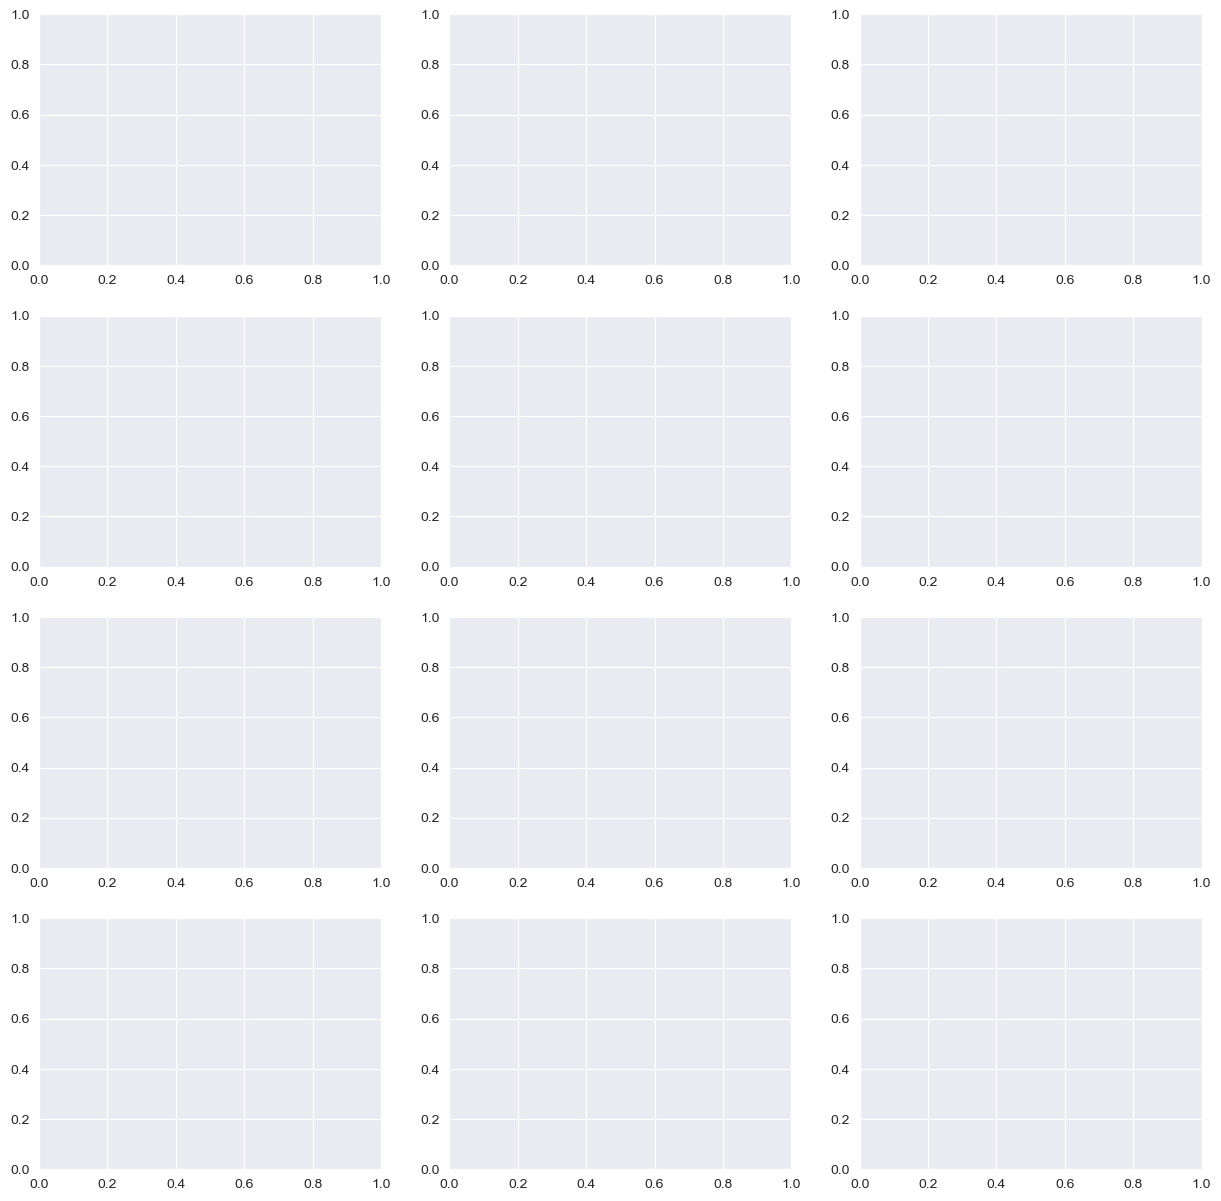

In [2]:
# 4x3 박스플롯 그리기 (Matplotlib 사용)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
a = 0

# 각각의 subplot에 박스플롯 그리기
for i in range(4):
    for j in range(3):
        index = i * 3 + j  # subplot의 인덱스 계산
        sns.boxplot(x=numeric_col[a], data=train, ax=axes[i, j])
        a = a +1

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

IndexError: index 14 is out of bounds for axis 0 with size 14

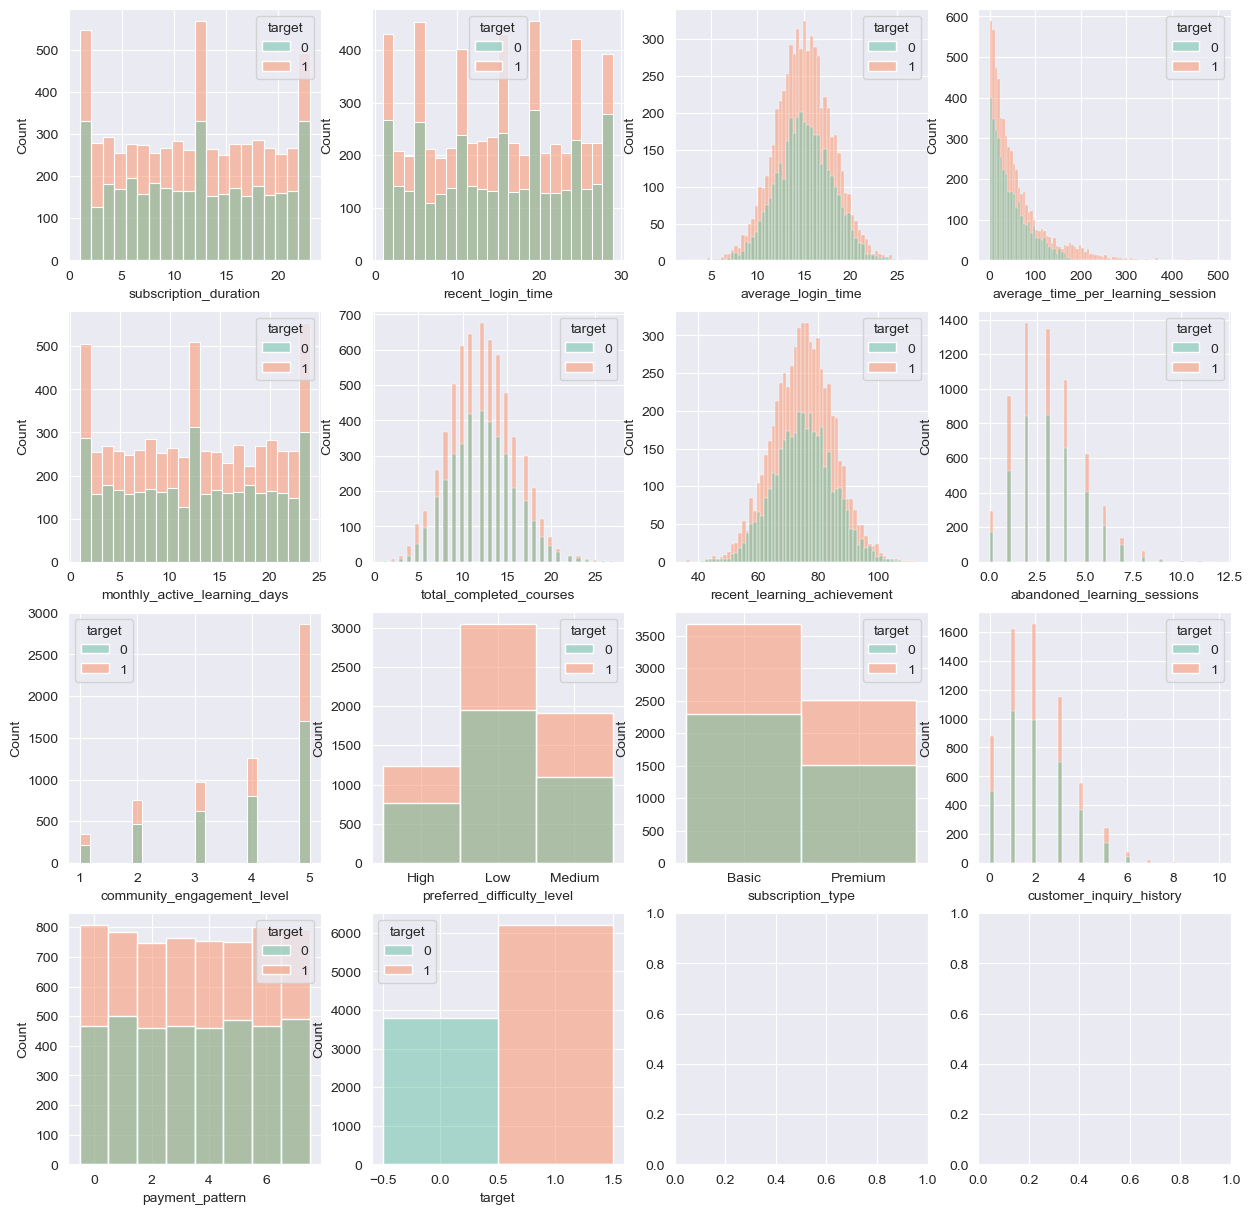

In [14]:
plt.show()
# 4x3 박스플롯 그리기 (Matplotlib 사용)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
a = 0

# 각각의 subplot에 박스플롯 그리기
for i in range(4):
    for j in range(4):
        index = i * 4 + j  # subplot의 인덱스 계산
        sns.histplot(x=train.columns[a], data=train, ax=axes[i, j], hue=train['target'], legend=True, palette='Set2'
                     )
        a = a + 1

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [15]:
train.head()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [39]:
X =train[['average_time_per_learning_session','recent_learning_achievement']].values
X

array([[  8.42718745,  68.36045451],
       [ 72.64608659,  97.5673218 ],
       [ 21.7744924 ,  94.35876337],
       ...,
       [127.30241095,  81.56783934],
       [  5.29723365,  89.8856557 ],
       [ 28.12003062,  64.81129699]])

In [61]:
dbscan = DBSCAN(eps=15, min_samples=10).fit(X)

In [62]:
labels = dbscan.labels_

pd.Series(labels).value_counts()

 0    9964
-1      36
Name: count, dtype: int64

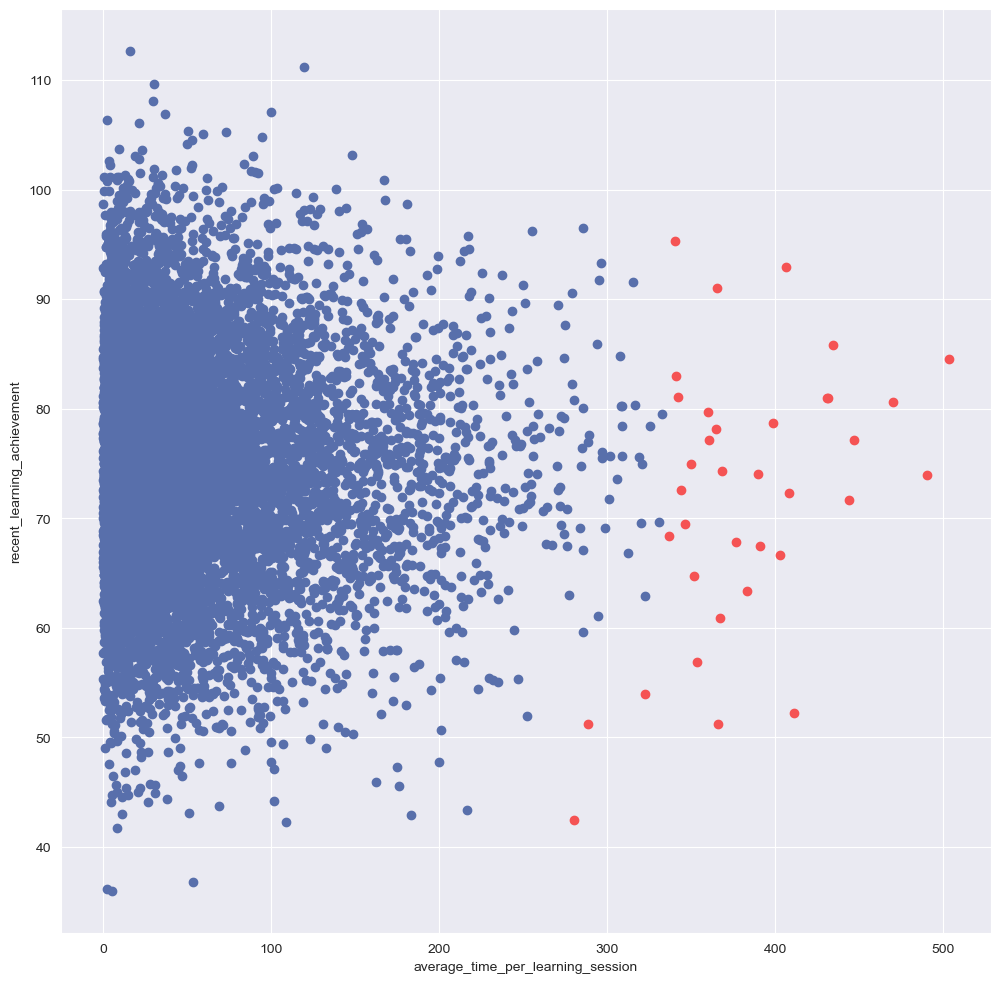

In [63]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['#586fab', '#f55354']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('average_time_per_learning_session');
plt.ylabel('recent_learning_achievement');

In [65]:
X =train[numeric_col].values
X

array([[13.        , 14.        , 14.94616267, ...,  3.        ,
         4.        ,  4.        ],
       [16.        , 18.        , 18.45322373, ...,  2.        ,
         3.        ,  1.        ],
       [22.        ,  1.        , 16.19522797, ...,  3.        ,
         4.        ,  0.        ],
       ...,
       [ 7.        , 27.        , 18.24097785, ...,  3.        ,
         5.        ,  1.        ],
       [11.        ,  7.        , 18.7838    , ...,  4.        ,
         5.        ,  2.        ],
       [10.        ,  5.        , 13.07322956, ...,  4.        ,
         5.        ,  0.        ]])

In [70]:
dbscan = DBSCAN(eps=20, min_samples=15).fit(X)

In [71]:
labels = dbscan.labels_

pd.Series(labels).value_counts()

 0    9936
-1      64
Name: count, dtype: int64

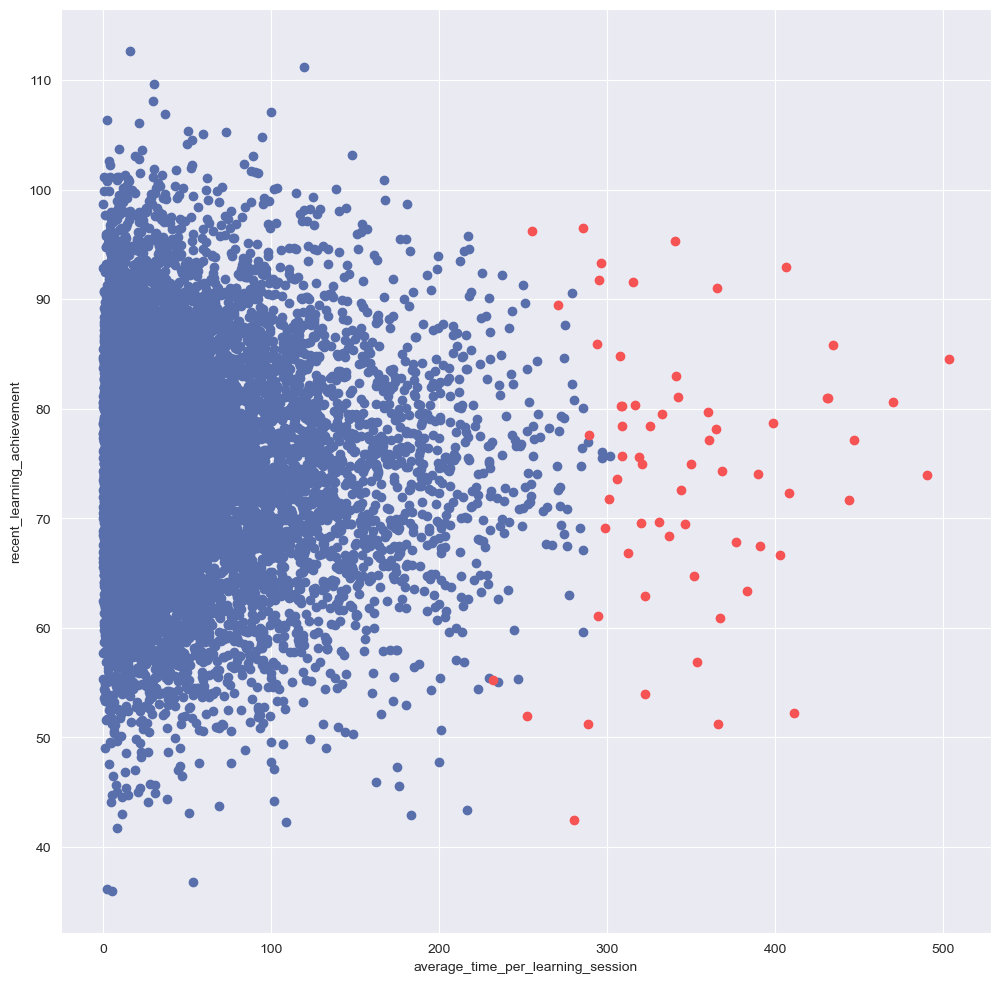

In [76]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['#586fab', '#f55354']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,3][sample_mask], X[:, 6][sample_mask], 'o', color=color);
plt.xlabel('average_time_per_learning_session');
plt.ylabel('recent_learning_achievement');

In [86]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터 불러오기 또는 생성하기
# 예를 들어, X와 y는 각각 특성과 레이블을 나타냅니다.
# X, y = load_data()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns='target'), train['target'], test_size=0.2, random_state=42)

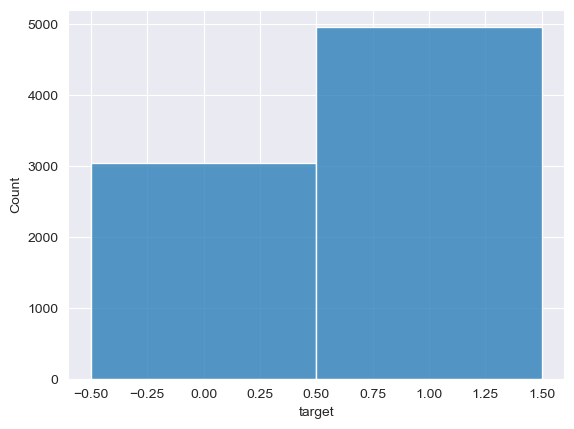

In [87]:
sns.histplot(y_train);

In [88]:
# RandomOverSampler를 사용하여 오버샘플링 수행
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [89]:
X_resampled

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,11,3,15.298435,35.587179,9,15,61.325364,4,5,Low,Basic,1,6
1,14,19,17.193117,185.901568,12,14,86.587523,1,5,Low,Basic,0,5
2,13,27,13.399272,1.903421,14,15,64.560131,3,4,Low,Premium,0,3
3,19,6,12.814237,89.294899,7,10,76.285842,1,4,Low,Premium,1,1
4,20,3,18.232309,76.949024,14,9,82.132995,4,4,Medium,Premium,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,7,11,11.974841,173.427672,17,6,73.729994,5,5,Low,Basic,5,4
9910,3,29,17.092036,57.076405,6,10,47.697361,6,3,Low,Basic,2,5
9911,4,2,18.521558,24.130652,21,15,81.836966,6,5,Low,Premium,4,5
9912,7,13,9.925444,42.231241,18,15,80.205547,2,4,Low,Premium,3,7


In [91]:
y_resampled

0       1
1       1
2       1
3       1
4       1
       ..
9909    0
9910    0
9911    0
9912    0
9913    0
Name: target, Length: 9914, dtype: category
Categories (2, int64): [0, 1]

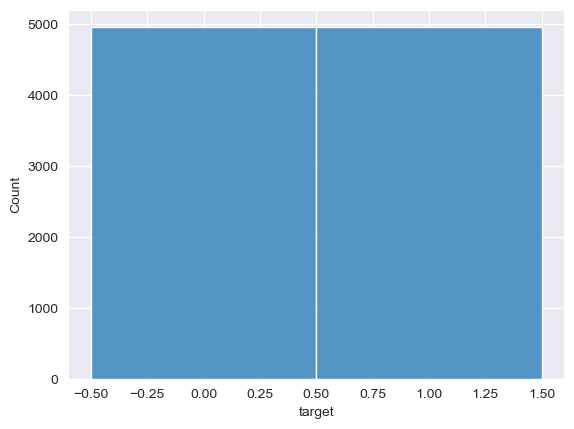

In [92]:
sns.histplot(y_resampled);

In [98]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()

label_encoders = {}
for col in categoric_col:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subscription_duration              10000 non-null  int64  
 1   recent_login_time                  10000 non-null  int64  
 2   average_login_time                 10000 non-null  float64
 3   average_time_per_learning_session  10000 non-null  float64
 4   monthly_active_learning_days       10000 non-null  int64  
 5   total_completed_courses            10000 non-null  int64  
 6   recent_learning_achievement        10000 non-null  float64
 7   abandoned_learning_sessions        10000 non-null  int64  
 8   community_engagement_level         10000 non-null  int64  
 9   preferred_difficulty_level         10000 non-null  int32  
 10  subscription_type                  10000 non-null  int32  
 11  customer_inquiry_history           10000 non-null  int6

In [105]:
correlation_matrix =train.corr()

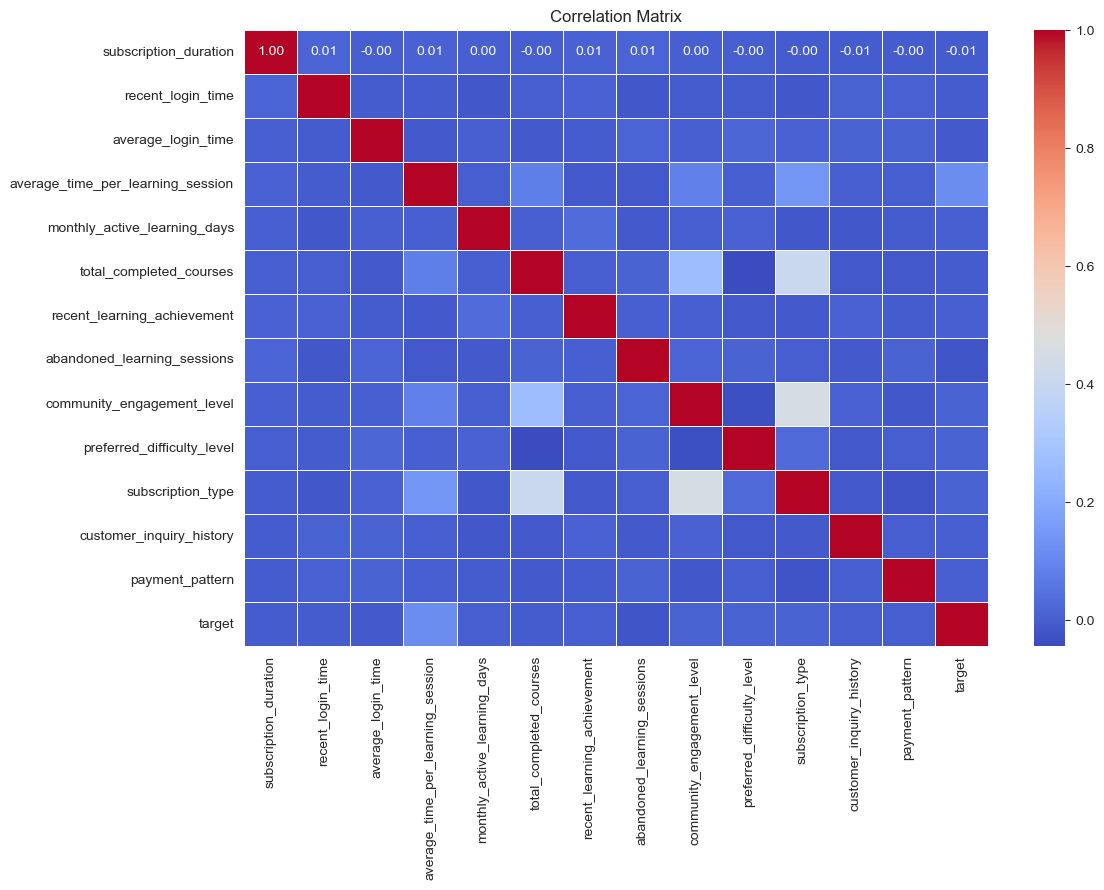

In [106]:
# 상관계수 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()